In [1]:
%matplotlib inline

In [2]:
import pandas as pd

### Cargar los conjuntos de datos

+ Cargar los datos de expresión genética $X$

In [3]:
X = pd.read_csv("matrix-MT_AfterPCA.csv", index_col=0)# rows represent genes and columns represent conditions

In [4]:
X

GSM3229893  GSM3229894  GSM3229895  GSM3229902  GSM3229903  \
Rv0001     8.448168    9.242174    8.609518    8.625042    8.375306   
Rv0002     7.018332    7.054956    7.251413    8.213414    7.968146   
Rv0003     6.082074    5.929181    6.144444    7.059091    6.940454   
Rv0004     6.746972    6.559071    6.601368    6.644559    6.685341   
Rv0005     9.526414    9.585069    9.545845    9.617032    9.539455   
...             ...         ...         ...         ...         ...   
Rv3920c    9.201877    9.113229    9.217973    9.588975    9.483261   
Rv3921c    8.863880    8.819495    8.806313    9.096335    9.069775   
Rv3922c    7.823838    8.080698    7.957810    9.124733    9.060108   
Rv3923c    8.342030    8.338711    8.054515    9.244347    9.243752   
Rv3924c    9.118993    9.046602    9.169189    9.882861    9.895304   

         GSM3229904  GSM3229911  GSM3229912  GSM3229913  GSM3230596  ...  \
Rv0001     8.752522    7.626334    6.853028    7.862423    8.546453  ...   
Rv0002     8.428257    7.606290    7.097382    7.793604    7.736873  ...   
Rv0003     6.893028    6.969696    6.785776    7.002397    6.781722  ...   
Rv0004     6.695078    6.707459    6.752608    6.598237    6.619904  ...   
Rv0005     9.713459    9.518295    9.453454    9.638239    9.531064  ...   
...             ...         ...         ...         ...         ...  ...   
Rv3920c    9.471906    9.521844    9.536765    9.567611    9.351985  ...   
Rv3921c    9.246554    9.025374    8.857350    9.037243    9.043492  ...   
Rv3922c    9.098963    9.052423    8.702506    9.193044    8.891107  ...   
Rv3923c    9.191991    9.362779    9.278254    9.494448    8.886913  ...   
Rv3924c    9.874061    9.719589    9.603496    9.786960    9.608540  ...   

         GSM5240577  GSM5240578  GSM5240579  GSM5240580  GSM5240581  \
Rv0001     8.431187    8.306105    8.509488    8.115309    8.325802   
Rv0002     6.750955    6.615496    8.542632    8.037298    6.955923   
Rv0003     7.097831    6.993568    6.820347    6.300313    6.910365   
Rv0004     7.311299    7.396090    6.589303    6.405759    7.088443   
Rv0005    10.185668   10.177200    9.245739    9.186731    9.864429   
...             ...         ...         ...         ...         ...   
Rv3920c    9.787143    9.863443    9.356304    9.230724    9.992385   
Rv3921c    9.542352    9.459349    8.999434    8.365514    9.604645   
Rv3922c    8.918225    8.947539    8.936875    8.495814    9.053860   
Rv3923c    8.866704    8.870424    9.217022    9.008319    9.028536   
Rv3924c    8.743041    8.747080   10.720273   10.074884    9.176250   

         GSM5240582  GSM5534454  GSM5534455  GSM5534456  GSM5534458  
Rv0001     8.308285    7.989610    8.573183    7.825769    8.875338  
Rv0002     6.886517    7.361270    7.990926    7.597836    7.466569  
Rv0003     7.067820    6.247096    7.116217    6.394426    6.840591  
Rv0004     7.391262    6.881990    6.744146    6.262666    6.839968  
Rv0005     9.947940    9.511073    9.648273    9.565235    9.570709  
...             ...         ...         ...         ...         ...  
Rv3920c   10.009382    9.427258    9.373972    9.335661    9.621782  
Rv3921c    9.749862    8.785464    9.050395    8.605942    9.338988  
Rv3922c    9.013692    8.617725    8.848893    8.213344    8.787340  
Rv3923c    8.966080    8.826904    8.903001    8.678966    9.176831  
Rv3924c    8.905936    9.343316    9.648885    9.306546    9.622392  

[4034 rows x 455 columns]

+ Cargar los factores de transcripción

In [5]:
tf = pd.read_csv("TF_M_tuberculosis_H37Rv.csv",header=None)[0]

In [6]:
tf

0       Rv0001
1      Rv0022c
2       Rv0023
3      Rv0042c
4      Rv0043c
        ...   
245    Rv2175c
246     Rv2669
247     Rv0485
248    Rv0891c
249    Rv1357c
Name: 0, Length: 250, dtype: object

# Inferir la GRN
+ Cargar la función 'score_links' y el método 'AdaBoost_classifier_score'

In [7]:
from grenadine.Inference.inference import score_links
from grenadine.Inference.classification_predictors import AdaBoost_classifier_score
from grenadine.Preprocessing.discretization import discretize_genexp

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Inference/inference.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2024-03-05 09:36:21.574048: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 09:36:21.765636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 09:36:22.465236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-05 09:36:23.361859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1

In [8]:
discr_method = lambda X: discretize_genexp (X, "efd", 5, axis=1)

+ Calificar todas las aristas posibles entre los factores de transcripción y los genes objetivo

In [9]:
score_matrix = score_links(X, AdaBoost_classifier_score, tf, discr_method=discr_method)

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The defa

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Preprocessing/discretization.py:88: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(data) == type(pd.Series()):


In [10]:
score_matrix

Rv0003  Rv0022c  Rv0023  Rv0042c  Rv0043c  Rv0047c  Rv0054  Rv0067c  \
Rv0001     0.02      0.0     0.0     0.00      0.0     0.00    0.00      0.0   
Rv0002     0.06      0.0     0.0     0.00      0.0     0.00    0.00      0.0   
Rv0003      NaN      0.0     0.0     0.00      0.0     0.00    0.00      0.0   
Rv0004     0.00      0.0     0.0     0.02      0.0     0.00    0.00      0.0   
Rv0005     0.00      0.0     0.0     0.00      0.0     0.00    0.00      0.0   
...         ...      ...     ...      ...      ...      ...     ...      ...   
Rv3920c    0.14      0.0     0.0     0.08      0.0     0.00    0.00      0.0   
Rv3921c    0.12      0.0     0.0     0.00      0.0     0.04    0.00      0.0   
Rv3922c    0.16      0.0     0.0     0.00      0.0     0.00    0.00      0.0   
Rv3923c    0.10      0.0     0.0     0.00      0.0     0.08    0.10      0.0   
Rv3924c    0.00      0.0     0.0     0.00      0.0     0.02    0.26      0.0   

         Rv0078  Rv0081  ...  Rv3736  Rv3744  Rv3765c  Rv3830c  Rv3833  \
Rv0001      0.0     0.0  ...    0.02     0.0     0.02      0.0     0.0   
Rv0002      0.0     0.0  ...    0.00     0.0     0.00      0.0     0.0   
Rv0003      0.0     0.0  ...    0.00     0.0     0.00      0.0     0.0   
Rv0004      0.0     0.0  ...    0.00     0.0     0.00      0.0     0.0   
Rv0005      0.0     0.0  ...    0.00     0.0     0.00      0.0     0.0   
...         ...     ...  ...     ...     ...      ...      ...     ...   
Rv3920c     0.0     0.0  ...    0.00     0.0     0.00      0.0     0.0   
Rv3921c     0.0     0.0  ...    0.00     0.0     0.00      0.0     0.0   
Rv3922c     0.0     0.0  ...    0.00     0.0     0.00      0.0     0.0   
Rv3923c     0.0     0.0  ...    0.00     0.0     0.00      0.0     0.0   
Rv3924c     0.0     0.0  ...    0.00     0.0     0.00      0.0     0.0   

         Rv3849  Rv3855  Rv3862c  Rv3863  Rv0001  
Rv0001      0.0     0.0      0.0     0.0     NaN  
Rv0002      0.0     0.0      0.0     0.0    0.00  
Rv0003      0.0     0.0      0.0     0.0    0.00  
Rv0004      0.0     0.0      0.0     0.0    0.00  
Rv0005      0.0     0.0      0.0     0.0    0.00  
...         ...     ...      ...     ...     ...  
Rv3920c     0.0     0.0      0.0     0.0    0.02  
Rv3921c     0.0     0.0      0.0     0.0    0.02  
Rv3922c     0.0     0.0      0.0     0.0    0.04  
Rv3923c     0.0     0.0      0.0     0.0    0.00  
Rv3924c     0.0     0.0      0.0     0.0    0.00  

[4034 rows x 249 columns]

In [11]:
score_matrix.to_csv("GRENADINE-AdaBoost_Classifier-MT.csv", sep = "\t", header = True)

# Visualizar los resultados

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

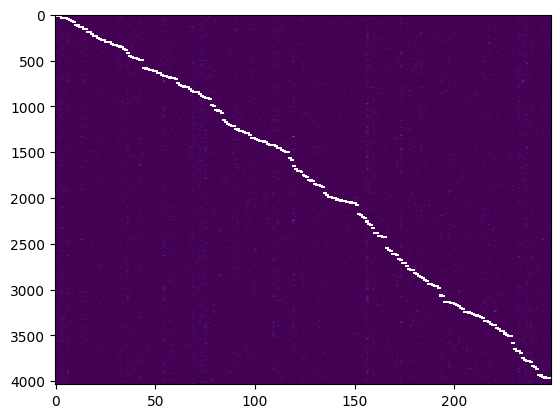

In [13]:
plt.imshow(score_matrix,aspect="auto")

# Clasificar las interacciones de acuerdo a sus puntuaciones

In [14]:
from grenadine.Inference.inference import rank_GRN
ranking = rank_GRN(score_matrix)

In [15]:
ranking.head(20)

rank  score       TF       TG
Rv2213_Rv2211c    1.0   0.76   Rv2213  Rv2211c
Rv2213_Rv1516c    2.0   0.68   Rv2213  Rv1516c
Rv3855_Rv3854c    3.0   0.54   Rv3855  Rv3854c
Rv0678_Rv0677c    4.0   0.52   Rv0678  Rv0677c
Rv1626_Rv2196     5.0   0.52   Rv1626   Rv2196
Rv2610c_Rv1293    6.0   0.52  Rv2610c   Rv1293
Rv2555c_Rv2553c   7.0   0.52  Rv2555c  Rv2553c
Rv0871_Rv1559     8.0   0.52   Rv0871   Rv1559
Rv0054_Rv0053     9.0   0.52   Rv0054   Rv0053
Rv2213_Rv2844    10.0   0.52   Rv2213   Rv2844
Rv1626_Rv1451    11.0   0.52   Rv1626   Rv1451
Rv0672_Rv0673    12.0   0.52   Rv0672   Rv0673
Rv3575c_Rv2357c  13.0   0.52  Rv3575c  Rv2357c
Rv3164c_Rv3566c  14.0   0.52  Rv3164c  Rv3566c
Rv2989_Rv2988c   15.0   0.52   Rv2989  Rv2988c
Rv0353_Rv0351    16.0   0.52   Rv0353   Rv0351
Rv2745c_Rv2710   17.0   0.52  Rv2745c   Rv2710
Rv0042c_Rv3392c  18.0   0.52  Rv0042c  Rv3392c
Rv1287_Rv1288    19.0   0.52   Rv1287   Rv1288
Rv3260c_Rv0309   20.0   0.52  Rv3260c   Rv0309

# Evaluar los resultados
+ Cargar los Gold Standard

In [16]:
grn = pd.read_csv("GS_MT-FINAL.csv",header=0)

In [17]:
grn

TF       TG  Unos
0        Rv0001   Rv0001     1
1        Rv0117   Rv0001     0
2        Rv0144   Rv0001     0
3       Rv0212c   Rv0001     0
4        Rv0302   Rv0001     0
...         ...      ...   ...
132629   Rv0576  Rv1999c     0
132630   Rv1379  Rv1999c     0
132631  Rv3082c  Rv1999c     0
132632  Rv1963c  Rv1999c     0
132633  Rv1846c  Rv1999c     0

[132634 rows x 3 columns]

In [18]:
# Renombrar las columnas y los indices
grn.columns = ["TF","TG","IS_REGULATED"]
grn.index = grn["TF"]+"_"+grn["TG"]
# Eliminar las filas duplicadas
grn = grn.drop_duplicates()

In [19]:
grn

TF       TG  IS_REGULATED
Rv0001_Rv0001     Rv0001   Rv0001             1
Rv0117_Rv0001     Rv0117   Rv0001             0
Rv0144_Rv0001     Rv0144   Rv0001             0
Rv0212c_Rv0001   Rv0212c   Rv0001             0
Rv0302_Rv0001     Rv0302   Rv0001             0
...                  ...      ...           ...
Rv0576_Rv1999c    Rv0576  Rv1999c             0
Rv1379_Rv1999c    Rv1379  Rv1999c             0
Rv3082c_Rv1999c  Rv3082c  Rv1999c             0
Rv1963c_Rv1999c  Rv1963c  Rv1999c             0
Rv1846c_Rv1999c  Rv1846c  Rv1999c             0

[132634 rows x 3 columns]

+ Cargar la función `evaluate_result` 

In [20]:
from grenadine.Evaluation.evaluation import evaluate_result

In [21]:
metrics = evaluate_result(score_matrix, grn, n_links=100000)

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Evaluation/evaluation.py:459: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ranks_top_in_golden = ranks_top.loc[mutual_edges]
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Evaluation/evaluation.py:461: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  golden = gold_std_grn.loc[mutual_edges]


In [22]:
metrics

AUROC        0.621150
AUPR         0.065744
Precision    0.046328
Recall       0.563380
Accuracy     0.639524
F1           0.085616
dtype: float64